# Team3_power_consumption


## Description

### Project: Predict the power consumption of a building

The city of Seattle is on a mission to become a carbon-neutral metropolis by the year 2050. One of the main contributors to carbon footprints across the city is its non-residential buildings. In alignment with this mission, a dedicated dataset encompassing emissions from these buildings during the years 2015 and 2016 has been made available. Given the significant expenses involved in surveying every building, our project will harness this dataset to predict the emissions of those buildings yet to be surveyed. In addition, we intend to assess the utility of the ENERGYSTAR Score, a metric that, while intricate in its formulation, might offer critical insights into emission predictions.

## Objectives

- Data Exploration: Delve deep into the dataset through exploratory analysis to uncover underlying patterns, potential anomalies, and the overall data structure.

- Data Cleaning: The second step will involve cleaning the dataset, addressing any missing values, outliers, and inconsistencies to ensure the integrity of our subsequent analyses and models.

- CO2 Emission Prediction: Design and implement models to anticipate the CO2 emissions of non-residential buildings. This predictive analysis will serve as a tool to flag high-emission buildings even in the absence of direct surveys.

- Energy Consumption Estimation: Parallel to the CO2 predictions, we'll predict the total energy consumption of these buildings, furnishing a comprehensive overview of their energy profiles.

- ENERGYSTAR Score Evaluation: We aim to dissect the potential of the ENERGYSTAR Score in predicting emissions. This objective will allow us to ascertain whether this complex metric genuinely offers value or if there's room to streamline its calculation without sacrificing its predictive power.

- Model Experimentation: Different predictive models will be trialed and tested to pinpoint the one rendering the most accurate forecasts. This phase will include rigorous regression performance reviews, hyperparameter optimizations, and judicious ML algorithm selections, all reinforced by cross-validation.

## Constraints

#### 1. Objective of Passing Annual Consumption Records:

- The primary objective of this project is to predict annual power consumption and CO2 emissions of non-residential buildings.
- The project may involve deducing simpler variables related to the nature and proportions of energy sources used within these buildings.
- This implies that the analysis may go beyond just predicting consumption records and could explore additional factors that impact energy use and emissions.

#### 2. Rigorous Evaluation of Regression Performance:

- The project places a strong emphasis on the evaluation of regression models used for prediction.
- It is expected that the performance of these models will be rigorously assessed using appropriate metrics to measure accuracy, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R²).
- The evaluation process will provide insights into how well the models are performing in predicting energy consumption and emissions.

#### 3. Optimizing Hyperparameters and ML Algorithm Choice:

- To achieve accurate predictions, the project involves optimization of hyperparameters. Hyperparameters are configuration settings of machine learning models that can significantly impact their performance.
- Various machine learning algorithms will be considered and tested to determine which one(s) are most effective for this specific prediction task.
- Cross-validation, a technique for assessing model performance on different subsets of the data, will be used to ensure that the chosen model is robust and not overfitting the data.

# 1. Data Acquisition

This section is responsible for importing necessary libraries and reading data from CSV files into Pandas DataFrames.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
df2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

df2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,...,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,...,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,...,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122...",4,NORTHEAST,1981,...,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


In [4]:
df2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


# Conclusion
In Data Acquisition section, we have successfully set up our data analysis environment by importing essential libraries such as NumPy, Pandas, Seaborn, and Matplotlib. These libraries provide powerful tools for data manipulation, visualization, and analysis, which will be instrumental in our exploration of the building energy benchmarking data.

We have also loaded the dataset into Pandas DataFrames: df2015 for the 2015 building energy benchmarking data and df2016 for the 2016 data. These DataFrames will serve as the foundation for our data exploration and analysis in the subsequent sections of our project.

# 2. Data Exploration 
In this section, we delve into the datasets to understand their structure, size, and the nature of the data they contain.

## 2.1 'df2015' DataFrame Exploration
This sub-section explores the 'df2015' DataFrame, including summary statistics and categorical column information.

In [5]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [6]:
df2015.isnull().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

## 2.2 'df2016' DataFrame Exploration
This sub-section explores the 'df2016' DataFrame, including summary statistics and categorical column information.

In [7]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [8]:
df2016.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


### Classifying Columns in 'df2015' as Numerical or Categorical

In [9]:
numerical_cols = df2015.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = df2015.select_dtypes(include=['object']).columns

# Define a function to classify columns as either 'Numerical' or 'Categorical'
def classify_column(col):
    if col in numerical_cols:
        return 'Numerical'
    return 'Categorical'

df_classification = pd.DataFrame({
    'Column Name': df2015.columns,
    'Type': [classify_column(col) for col in df2015.columns]
})

df_classification

,Column Name,Type
0,OSEBuildingID,Numerical
1,DataYear,Numerical
2,BuildingType,Categorical
3,PrimaryPropertyType,Categorical
4,PropertyName,Categorical
5,TaxParcelIdentificationNumber,Categorical
6,Location,Categorical
7,CouncilDistrictCode,Numerical
8,Neighborhood,Categorical
9,YearBuilt,Numerical


# Conclusion
In Data Exploration section, we conducted a thorough exploration of two essential DataFrames: 'df2015' and 'df2016.' Here's a summary of our key findings and observations:

### 2.1 'df2015' DataFrame Exploration:

- DataFrame Information: The 'df2015' DataFrame contains 3340 entries and 47 columns, encompassing a variety of data types, including integers, floats, and objects.

- Missing Values: We identified several columns with missing values, such as 'YearsENERGYSTARCertified,' 'SecondLargestPropertyUseType,' 'ThirdLargestPropertyUseType,' and 'Comment.' These missing values may require further handling.

- Categorical Columns: We observed numerous categorical columns, including 'BuildingType,' 'PrimaryPropertyType,' 'Neighborhood,' 'DefaultData,' and 'ComplianceStatus.' Understanding these categorical variables is crucial for effective data categorization and summarization.

- Numeric Columns: Numeric columns such as 'YearBuilt,' 'NumberofBuildings,' and various energy-related metrics provide quantitative information for analysis.

### 2.2 'df2016' DataFrame Exploration:

- DataFrame Information: The 'df2016' DataFrame consists of 3376 entries and 46 columns with a mix of data types, including integers, floats, objects, and boolean values.

- Missing Values: Similar to 'df2015,' 'df2016' contains columns with missing values. These include 'YearsENERGYSTARCertified,' 'SecondLargestPropertyUseType,' 'ThirdLargestPropertyUseType,' and more.

- Categorical Columns: Categorical columns such as 'BuildingType,' 'PrimaryPropertyType,' 'Neighborhood,' 'DefaultData,' and 'ComplianceStatus' were identified in 'df2016.'

- Numeric Columns: Numeric columns in 'df2016' provide information related to building characteristics, energy consumption, and emissions.

# 3. Missing Data Visualization 
This section visualizes the missing data in the datasets, providing a heatmap representation which can give a clear idea about the columns that might need data imputation or other preprocessing steps.

## 3.1 Visualization of Missing Data in 'df2015'
Visualize missing data in the 'df2015' DataFrame to identify columns with missing values.

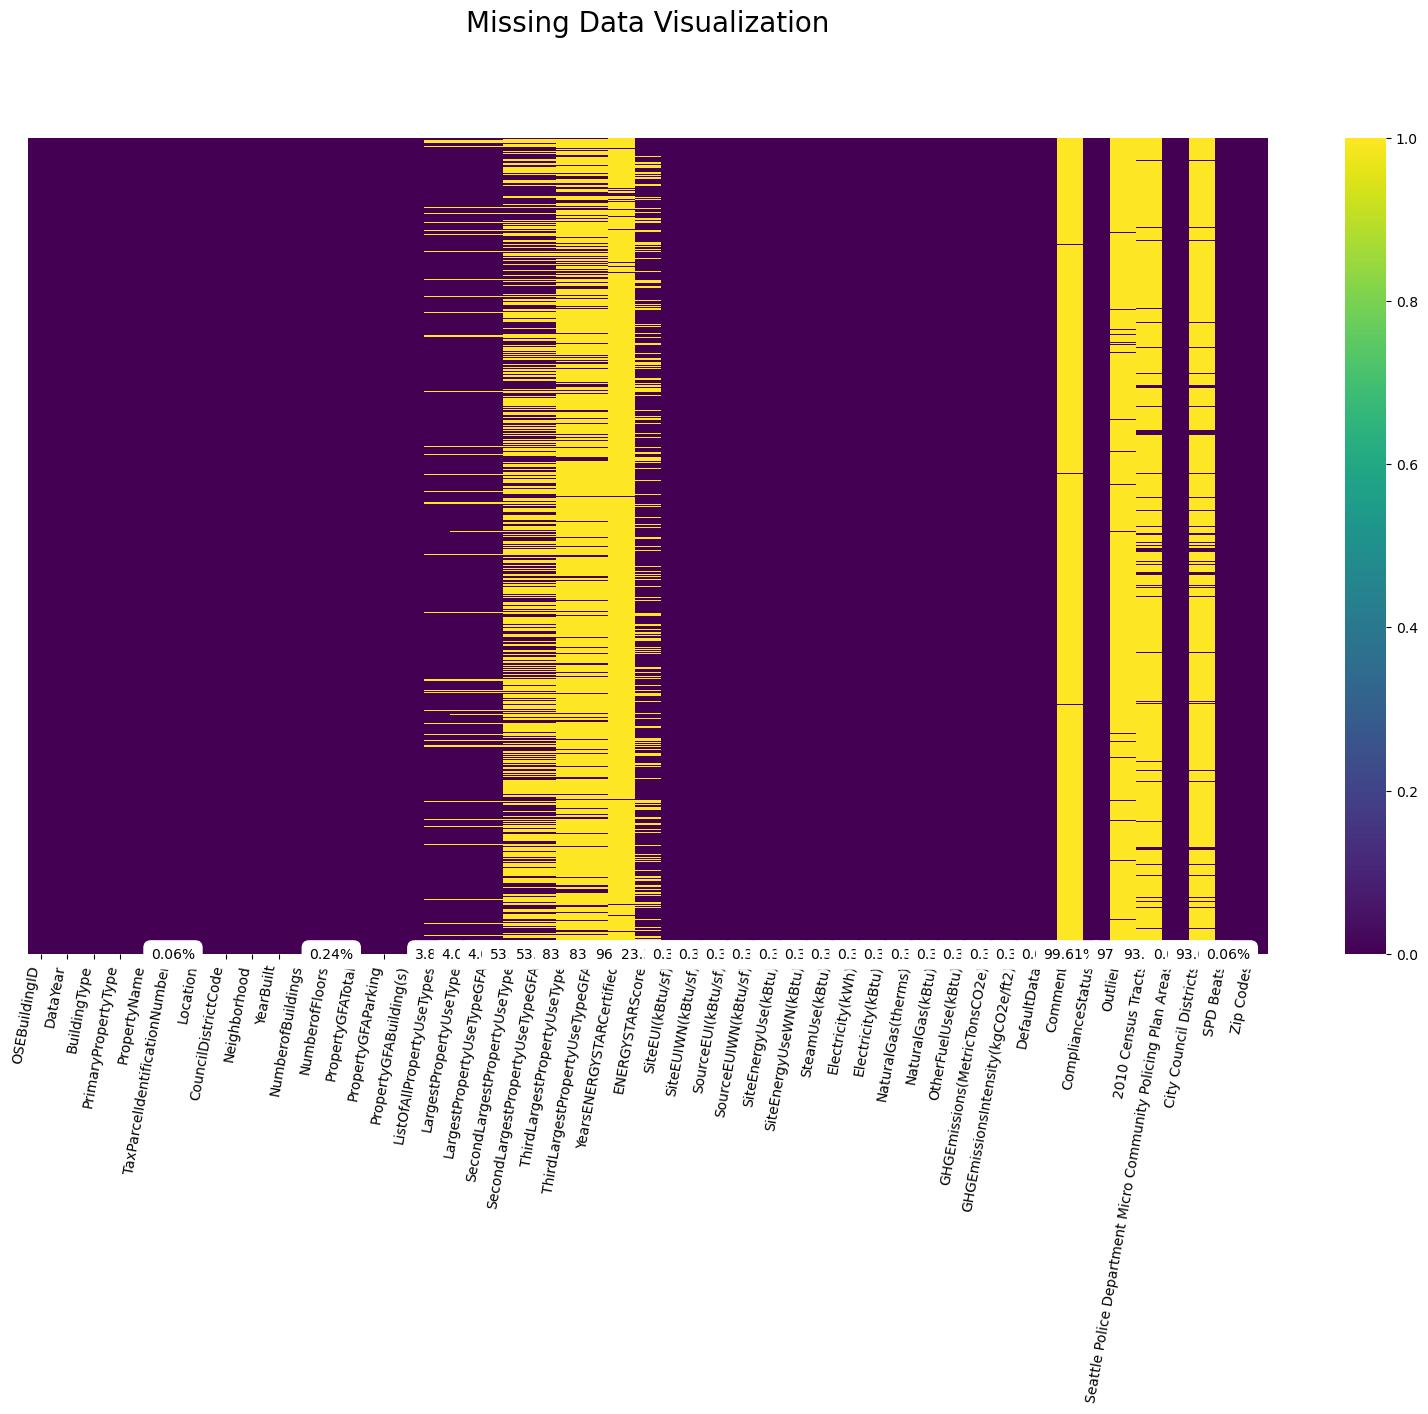

In [10]:
plt.figure(figsize=(20, 12))

sns.heatmap(df2015.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(df2015.columns), 1), df2015.columns, rotation=80, ha='right', fontsize=10)  

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(df2015.columns):
    missing_percentage = df2015[column].isnull().mean()
    if missing_percentage > 0:
        plt.text(i + 0.5, df2015.shape[0] + 4, f"{missing_percentage:.2%}", 
                 ha='center', va='center', fontsize=10, color='black', 
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

### Filtered Visualization for Columns with Missing Data in 'df2015'

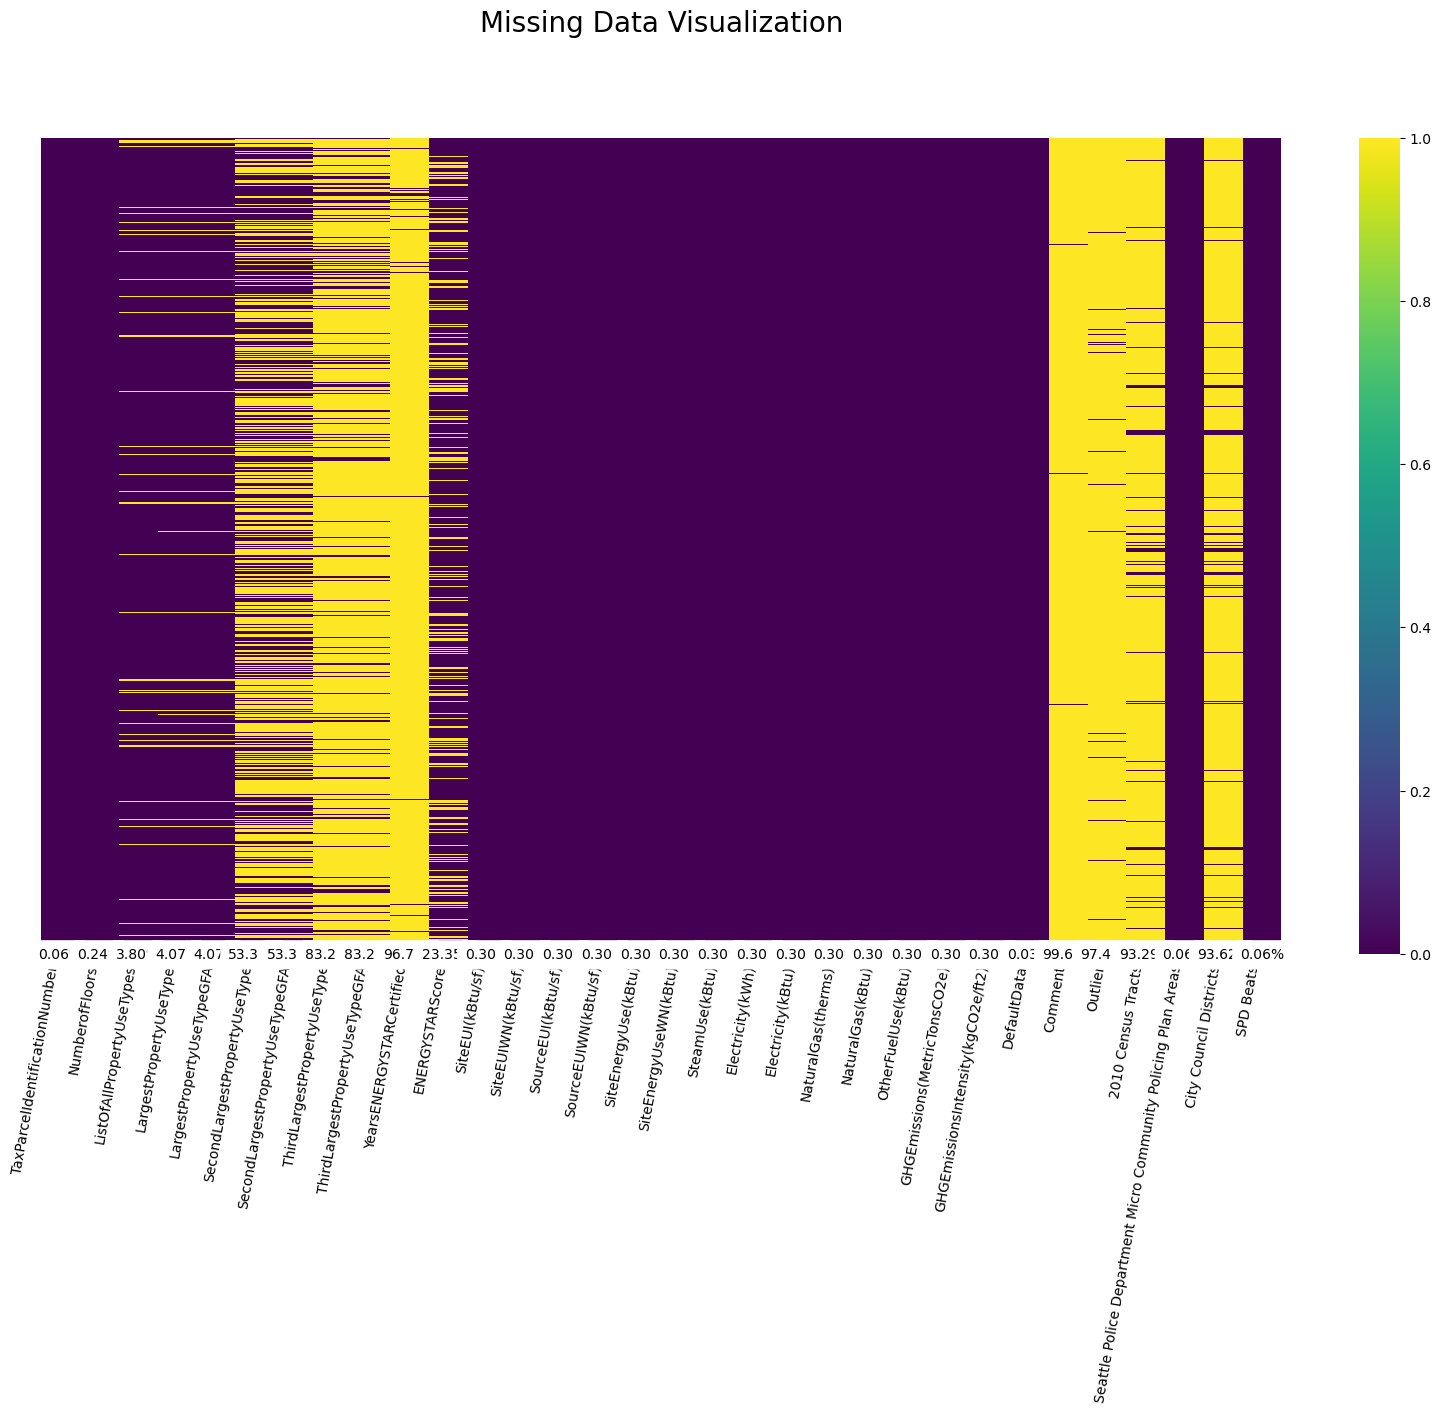

In [11]:
missing_data_cols = df2015.columns[df2015.isnull().any()].tolist()

filtered_df = df2015[missing_data_cols]

plt.figure(figsize=(20, 12))

sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(filtered_df.columns), 1), filtered_df.columns, rotation=80, ha='right', fontsize=10)  

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(filtered_df.columns):
    missing_percentage = filtered_df[column].isnull().mean()
    plt.text(i + 0.5, filtered_df.shape[0] + 4, f"{missing_percentage:.2%}", 
             ha='center', va='center', fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

### Visualization of Missing Data in 'df2016'

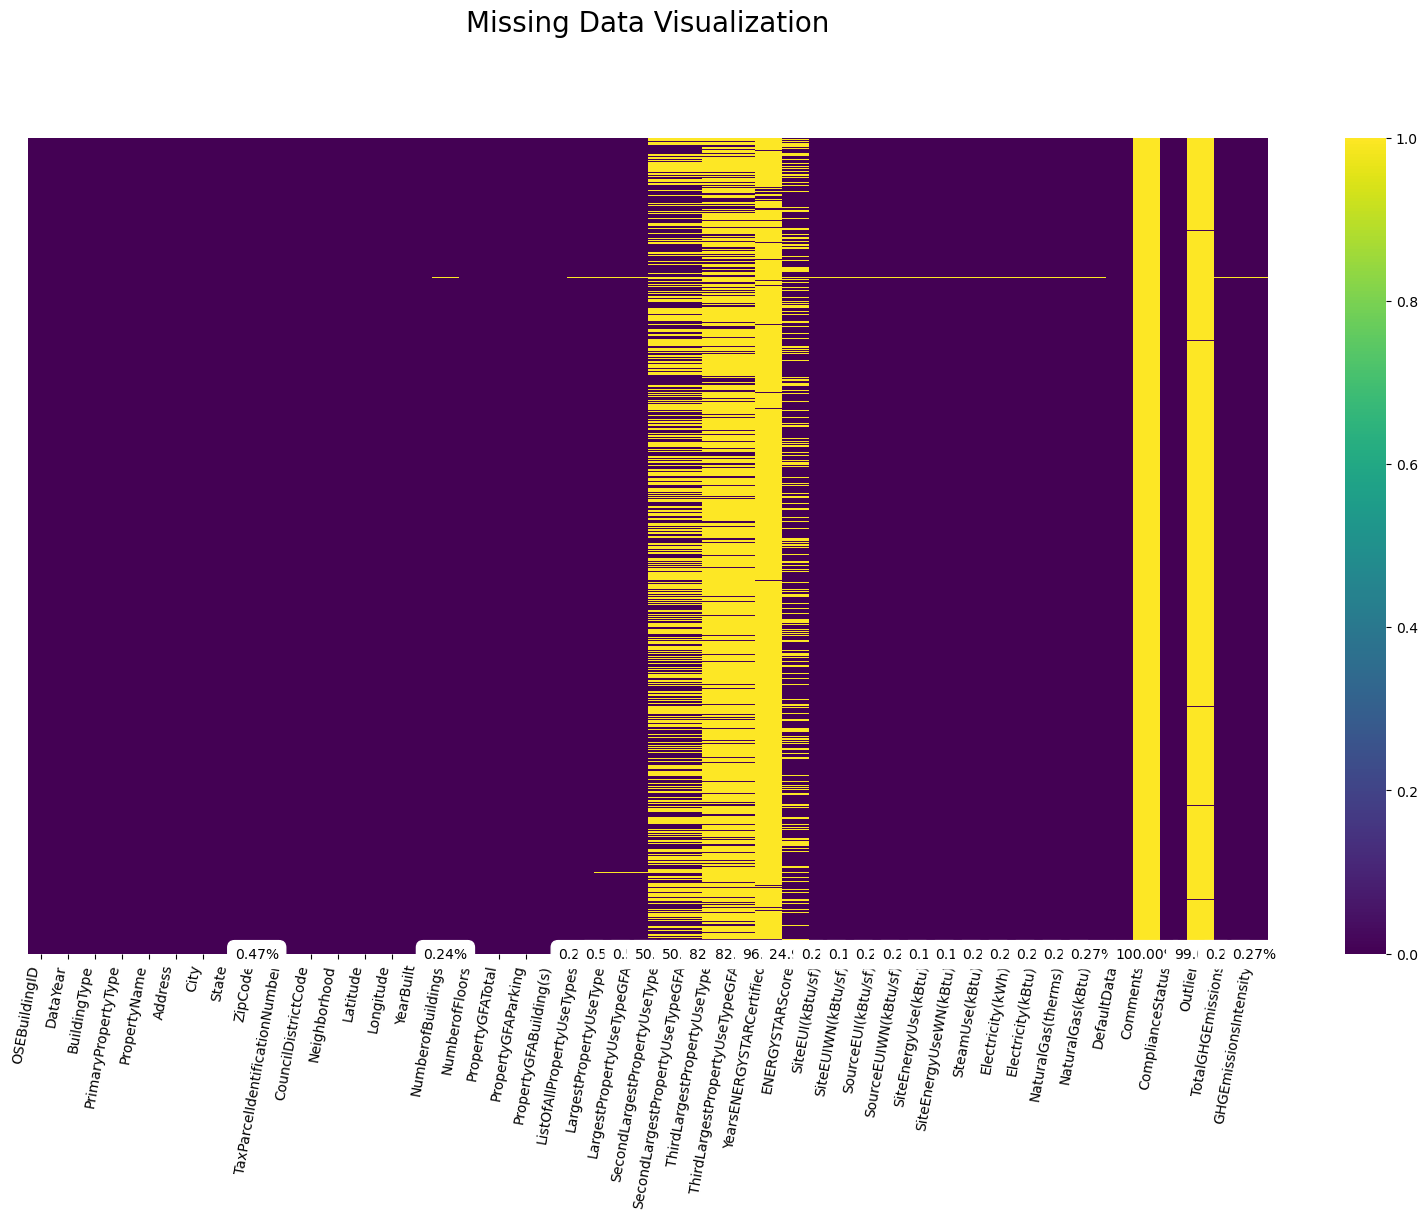

In [12]:
plt.figure(figsize=(20, 12))

sns.heatmap(df2016.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(df2016.columns), 1), df2016.columns, rotation=80, ha='right', fontsize=10) 

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(df2016.columns):
    missing_percentage = df2016[column].isnull().mean()
    if missing_percentage > 0:
        plt.text(i + 0.5, df2016.shape[0] + 4, f"{missing_percentage:.2%}", 
                 ha='center', va='center', fontsize=10, color='black', 
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

### Filtered Visualization for Columns with Missing Data in 'df2016'

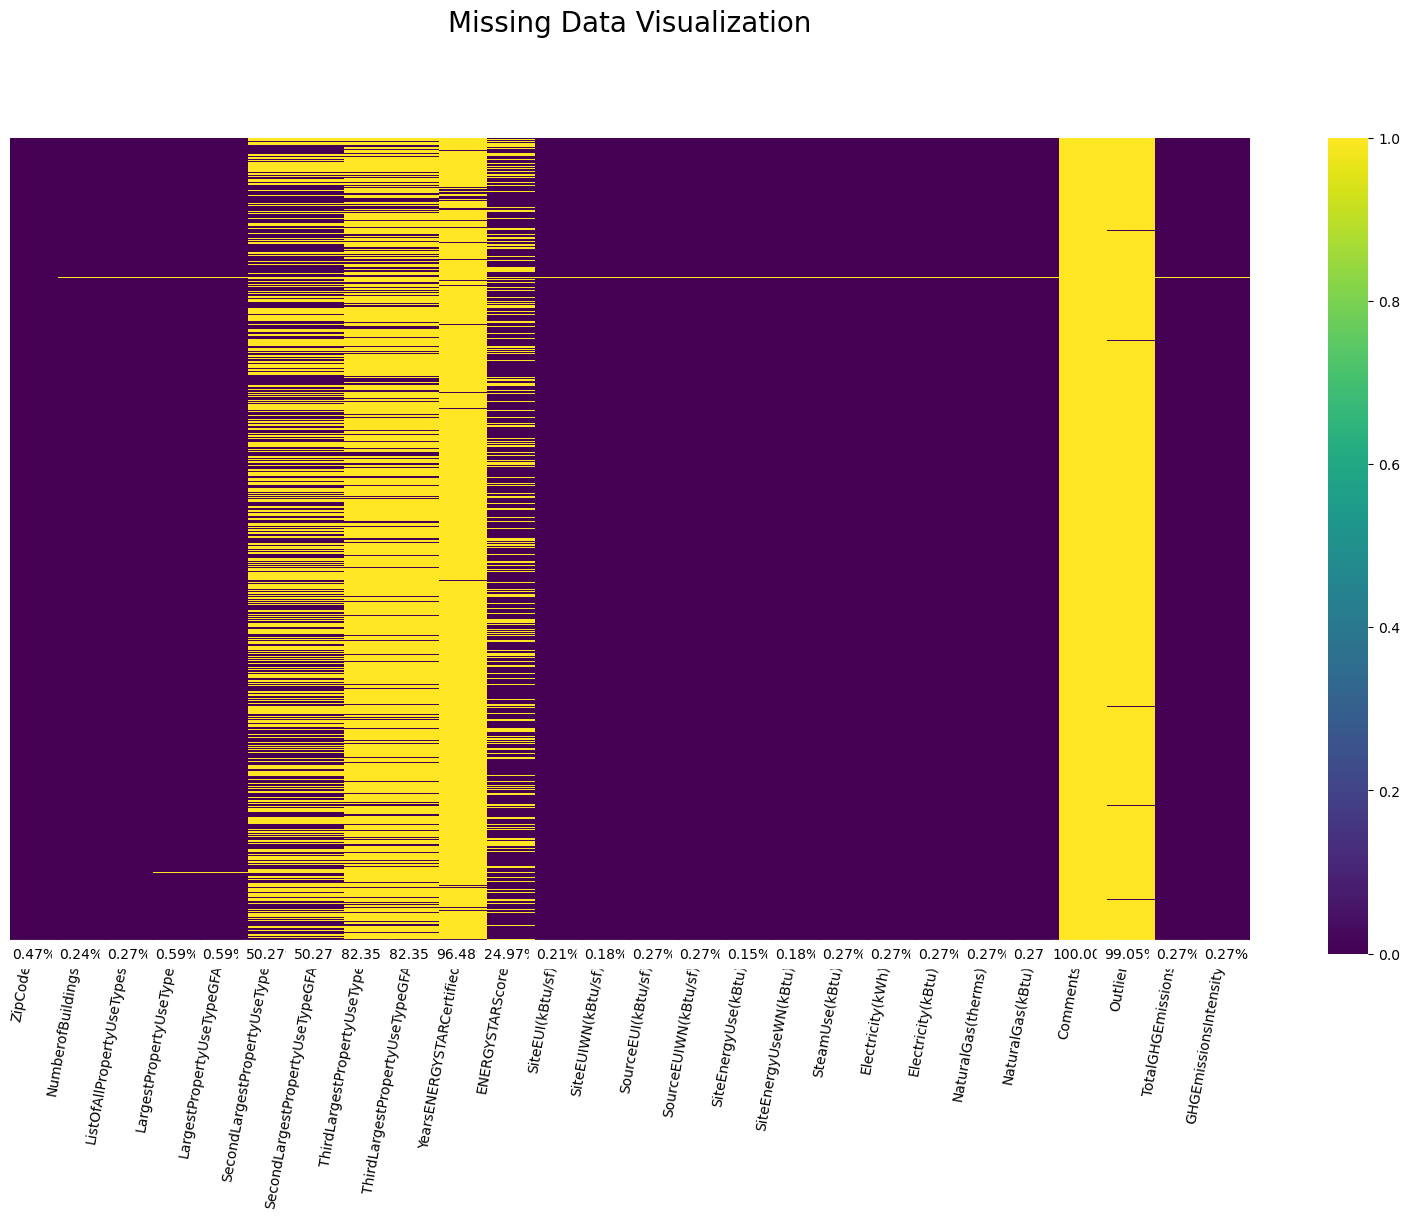

In [13]:
missing_data_cols = df2016.columns[df2016.isnull().any()].tolist()

filtered_df = df2016[missing_data_cols]

plt.figure(figsize=(20, 12))

sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(filtered_df.columns), 1), filtered_df.columns, rotation=80, ha='right', fontsize=10) 

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(filtered_df.columns):
    missing_percentage = filtered_df[column].isnull().mean()
    plt.text(i + 0.5, filtered_df.shape[0] + 4, f"{missing_percentage:.2%}", 
             ha='center', va='center', fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

# Conclusion
In Missing Data Visualization section, we visualized missing data in the 'df2015' and 'df2016' DataFrames using heatmaps. This visualization approach allowed us to gain insights into the columns with missing values, their distribution, and the extent of missingness. Here are the key takeaways from our missing data visualization:

### 3.1 Visualization of Missing Data in 'df2015':

- We created a heatmap representation of missing data in the 'df2015' DataFrame, where each column corresponds to a feature, and rows represent individual data points.
- The heatmap color-codes missing values, with yellow indicating missing data and purple representing non-missing data.
- The visualization provides a clear overview of columns with varying degrees of missingness.
- We annotated the heatmap with the percentage of missing values for each column, making it easier to identify columns with significant missing data.
- We also created a filtered visualization that focused solely on columns with missing data, providing a more detailed view of these columns.

### 3.2 Visualization of Missing Data in 'df2016':

- Similarly, we created heatmaps for the 'df2016' DataFrame to visualize missing data in this dataset.
- The visualization highlights columns with missing values and provides insights into the extent of missingness in each column.
- As with 'df2015,' we annotated the heatmap with the percentage of missing values for each column and created a filtered visualization for columns with missing data.

# 4. Data Summarization
This section is dedicated to summarizing the datasets to provide key statistics, especially focusing on numerical columns, and also showcasing the top unique values for categorical columns.
## 4.1 'df2015' Data Summarization

In [14]:
numerical_summary = df2015.describe()

numerical_summary

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [15]:
categorical_cols = df2015.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df2015[col].nunique()}")
    print(f"Most common values:\n{df2015[col].value_counts().head()}\n")

Column: BuildingType
Number of unique values: 7
Most common values:
NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Name: BuildingType, dtype: int64

Column: PrimaryPropertyType
Number of unique values: 27
Most common values:
Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Name: PrimaryPropertyType, dtype: int64

Column: PropertyName
Number of unique values: 3287
Most common values:
WAREHOUSE                   9
OFFICE BUILDING             8
CLOVERDALE BUSINESS PARK    5
APARTMENTS                  4
CANAL PL OFFICE PARK        3
Name: PropertyName, dtype: int64

Column: TaxParcelIdentificationNumber
Number of unique values: 3245
Most common values:
925049346     5
3224049012    5
2400002       5
8632880000    4
3624039009    4
Name: TaxParcelIdentificationNumber, d

## 4.2 'df2016' Data Summarization

In [16]:
numerical_summary = df2016.describe()

numerical_summary

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [17]:
categorical_cols = df2016.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df2016[col].nunique()}")
    print(f"Most common values:\n{df2016[col].value_counts().head()}\n")

Column: BuildingType
Number of unique values: 8
Most common values:
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Name: BuildingType, dtype: int64

Column: PrimaryPropertyType
Number of unique values: 24
Most common values:
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Name: PrimaryPropertyType, dtype: int64

Column: PropertyName
Number of unique values: 3362
Most common values:
Northgate Plaza               3
Canal Building                2
Jefferson Court Apartments    2
Bayview Building              2
Crestview Apartments          2
Name: PropertyName, dtype: int64

Column: Address
Number of unique values: 3354
Most common values:
2600 SW Barton St              4
2203 Airport Way S             4
309 South Cloverdale Street    4
516 1st Ave W                  

# Conclusion
In Data Summarization section, we conducted data summarization for 'df2015' and 'df2016' datasets, providing key insights:

### 4.1 'df2015' Data:

- Numerical Summary: We examined numerical columns, highlighting property size variations, construction years, and more.
- Categorical Summary: We outlined the number of unique values and common entries in categorical columns, revealing property types like Low-Rise Multifamily and Non-Residential.

### 4.2 'df2016' Data:

- Numerical Summary: Similar to 'df2015,' we analyzed numerical columns, emphasizing property sizes, construction years, and energy-related differences.
- Categorical Summary: We provided insights into categorical columns, showing property types and common entries.

These summaries set the stage for subsequent data analysis and modeling, enabling informed decisions regarding data preprocessing, feature selection, and modeling strategies. The diversity in property types and energy-related characteristics within the datasets informs future analytical work.

# 5. Dataset Comparison

This section of the code is dedicated to comparing the structures of the df2015 and df2016 datasets by examining their columns. This comparison provides insights into the similarities and differences in the datasets' structures. By closely examining these elements, we can more effectively handle inconsistencies.

### Display Common Columns
Find columns that are common in both DataFrames. It checks column names within those columns.

In [22]:
def display_common_columns(df, common_columns):
    columns_df = set(df.columns)
    common_columns = columns_df.intersection(common_columns)
    
    print("Common Columns:")
    print("----------------")
    if common_columns:
        print('\n'.join(common_columns))
    else:
        print("No common columns")
common_columns = set(df2015.columns).intersection(set(df2016.columns))
display_common_columns(df2015, common_columns)

Common Columns:
----------------
YearBuilt
PropertyGFATotal
SiteEUIWN(kBtu/sf)
SiteEnergyUseWN(kBtu)
Neighborhood
DefaultData
PropertyName
SecondLargestPropertyUseTypeGFA
SteamUse(kBtu)
NaturalGas(therms)
TaxParcelIdentificationNumber
ComplianceStatus
DataYear
SourceEUIWN(kBtu/sf)
CouncilDistrictCode
OSEBuildingID
SecondLargestPropertyUseType
Electricity(kWh)
PrimaryPropertyType
NumberofBuildings
LargestPropertyUseTypeGFA
YearsENERGYSTARCertified
Outlier
PropertyGFABuilding(s)
LargestPropertyUseType
ListOfAllPropertyUseTypes
NaturalGas(kBtu)
SiteEUI(kBtu/sf)
PropertyGFAParking
SiteEnergyUse(kBtu)
ENERGYSTARScore
ThirdLargestPropertyUseType
Electricity(kBtu)
BuildingType
ThirdLargestPropertyUseTypeGFA
SourceEUI(kBtu/sf)
NumberofFloors


### Display Columns present in df2015 but not in df2016

In [28]:
# Function to display columns unique to a dataframe
def display_columns_unique_to_df(df, df_name, common_columns):
    columns_df = set(df.columns)
    unique_columns = columns_df.difference(common_columns)

    print(f"Unique columns in {df_name}:")
    print("------------------------------------")
    if unique_columns:
        print('\n'.join(unique_columns))
    else:
        print(f"No unique columns in {df_name}")

display_columns_unique_to_df(df2015, "df2015", common_columns)

Unique columns in df2015:
------------------------------------
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
Seattle Police Department Micro Community Policing Plan Areas
2010 Census Tracts
Location
Zip Codes
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
SPD Beats
City Council Districts


###  Display Columns present in df2016 but not in df2015

In [29]:
display_columns_unique_to_df(df2016, "df2016", common_columns)

Unique columns in df2016:
------------------------------------
ZipCode
Comments
GHGEmissionsIntensity
TotalGHGEmissions
Longitude
State
Latitude
Address
City


### Display Identical Columns
identical_columns function compares two DataFrames and returns a list of columns that are identical in both.
It checks both column names and values within those columns.

In [30]:
def display_identical_columns(df1, df2, df1_name, df2_name):
    identical_cols = []

    for col in common_columns:
        if df1[col].equals(df2[col]):
            identical_cols.append(col)

    print(f"Identical Columns between {df1_name} and {df2_name}:")
    print("------------------")
    if identical_cols:
        print('\n'.join(identical_cols))
    else:
        print(f"No identical columns found between {df1_name} and {df2_name}")

display_identical_columns(df2015, df2016, 'df2015', 'df2016')

Identical Columns between df2015 and df2016:
------------------
No identical columns found between df2015 and df2016


### Duplicate Rows Check

In [32]:
# Function to display duplicate rows in a dataframe
def display_duplicate_rows(df, df_name):
    duplicate_rows = df[df.duplicated()]

    print(f"Number of duplicate rows in {df_name}: {len(duplicate_rows)}")

    if len(duplicate_rows) > 0:
        print(f"Displaying duplicate rows in {df_name}:")
        print(duplicate_rows)
    
display_duplicate_rows(df2015, 'df2015')
display_duplicate_rows(df2016, 'df2016')

Number of duplicate rows in df2015: 0
Number of duplicate rows in df2016: 0


# Conclusion

In Dataset Comparison section, we compared the structures of the 'df2015' and 'df2016' datasets to identify similarities and differences. Here are the key findings:

- Common Columns: We identified columns that are present in both datasets. These common columns are crucial for aligning and merging the datasets for analysis.

- Columns Unique to df2015: Several columns were found in 'df2015' but not in 'df2016,' such as 'OtherFuelUse(kBtu),' 'Location,' 'Comment,' and more. Understanding these distinctions is essential when working with both datasets.

- Columns Unique to df2016: Conversely, 'df2016' contained columns not present in 'df2015,' including 'City,' 'State,' 'ZipCode,' and others. Recognizing these distinctions is vital for data integration.

- Identical Columns: We checked for identical columns with matching values between the two datasets. No identical columns were found, indicating some variations in data.

- Duplicate Rows Check: We examined both datasets for duplicate rows, and no duplicates were detected in either 'df2015' or 'df2016.'

# 6. Data Cleaning

### 6.2 Expanding Nested Columns in 'df2015' Dataset
In this section, we will expand the Location column in the df2015 DataFrame. This column contains serialized strings representing dictionary-like structures that hold multiple attributes such as latitude, longitude, address, city ,and state.
Expanding this column will transform each attribute within the serialized string into individual columns in our DataFrame, enhancing the readability and usability of the dataset. 

In [117]:
df2015_expanded = pd.concat([
    df2015.drop(['Location'], axis=1),
    df2015['Location'].map(ast.literal_eval).apply(pd.Series)
], axis=1)

df2015 = pd.concat([
    df2015_expanded.drop(['human_address'], axis=1),
    df2015_expanded['human_address'].map(ast.literal_eval).apply(pd.Series)
], axis=1)

df2015.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'address': 'Address',
    'city': 'City',
    'state': 'State',
}, inplace=True)

df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,...,26.0,NaN,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,...,60.0,NaN,38.0,18383,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,...,56.0,NaN,7.0,19576,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981,1,...,55.0,NaN,48.0,18792,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


### 6.3 Removal of Irrelevant Columns

- TaxParcelIdentificationNumber: This is likely a unique identifier for tax purposes and does not hold analytical value for our study on emissions and energy usage.
- YearsENERGYSTARCertified: The years in which the building was ENERGY STAR certified may not contribute to our current analysis objectives.
- DefaultData: this column consists mostly of missing data, it would not provide valuable insights.
- Outlier: Columns labeling outliers are generally for information purposes and are not be essential for primary analysis objectives.
- City and State: Since the datasets likely pertain to buildings within a specific city and state, these columns might not offer variability or contribute to the analysis.
- OtherFuelUse(kBtu) column : Majority of values are zero
- 2010 Census Tracts , SPD Beats and Seattle Police Department Micro Community Policing Plan Areas columns : Not relevant to our analysis
- City Council Districts column: Most values are missing
- Comments column: Contains annotations that are not pertinent to predicting emissions or consumption

#### 6.3.1 Dropping Irrelevant Columns from 2015 Dataset
In this step, we are focusing on refining the 2015 dataset by removing columns that are not present in the 2016 dataset and are not relevant or essential.

In [118]:
columns_to_drop = [
    'TaxParcelIdentificationNumber',
    'YearsENERGYSTARCertified',
    'DefaultData',
    'Outlier',
    'City',
    'State',
    'OtherFuelUse(kBtu)',  
    '2010 Census Tracts', 
    'Seattle Police Department Micro Community Policing Plan Areas',  
    'City Council Districts', 
    'SPD Beats', 
    'Comments',
    'Zip Codes'
]

df2015.drop(columns=columns_to_drop, inplace=True)

df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Latitude,Longitude,Address,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,7,DOWNTOWN,1927,1,12.0,...,3686160.0,12724.0,1272388.0,249.43,2.64,Compliant,47.61219025,-122.33799744,405 OLIVE WAY,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,7,DOWNTOWN,1996,1,11.0,...,3905411.0,44490.0,4448985.0,263.51,2.38,Compliant,47.61310583,-122.33335756,724 PINE ST,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,7,DOWNTOWN,1969,1,41.0,...,49762435.0,37099.0,3709900.0,2061.48,1.92,Compliant,47.61334897,-122.33769944,1900 5TH AVE,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,7,DOWNTOWN,1926,1,10.0,...,2769023.0,20019.0,2001894.0,1936.34,31.38,Compliant,47.61421585,-122.33660889,620 STEWART ST,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,7,DOWNTOWN,1980,1,18.0,...,6066245.0,87631.0,8763105.0,507.70,4.02,Compliant,47.6137544,-122.3409238,401 LENORA ST,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,2,DOWNTOWN,2000,1,4.0,...,1142996.0,0.0,0.0,7.97,0.07,Compliant,47.59950256,-122.32034302,321 10TH AVE S,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,4,NORTHEAST,2014,1,7.0,...,1111352.0,4320.0,431976.0,30.69,0.61,Compliant,47.65752471,-122.3160159,4123 12TH AVE NE,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,7,DOWNTOWN,2015,1,40.0,...,5767761.0,110669.0,11066893.0,627.97,1.89,Compliant,47.61649845,-122.33770787,2030 8TH AVE,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,4,NORTHEAST,1981,1,3.0,...,777096.0,0.0,0.0,5.42,0.04,Compliant,47.68396954,-122.2874088,3801 NE 77TH ST,98115


#### 6.3.2  Dropping Irrelevant Columns from 2016 Dataset
In this step, we will remove several columns deemed not relevant from df2016 datasets.


In [119]:
non_pertinent_columns = [
    'TaxParcelIdentificationNumber',
    'YearsENERGYSTARCertified',
    'DefaultData',
    'Outlier',
    'City',
    'State',
    'Comments'
]

df2016.drop(columns=non_pertinent_columns, inplace=True)

print("Modified df2016:")
df2016

Modified df2016:


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,7,DOWNTOWN,47.61220,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,7,DOWNTOWN,47.61317,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,2,GREATER DUWAMISH,47.56722,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,2,DOWNTOWN,47.59625,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,7,MAGNOLIA / QUEEN ANNE,47.63644,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,1,GREATER DUWAMISH,47.52832,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57


### 6.3 Rename Columns
Renaming the columns in df2015 DataFrame to make them consistent with df2016.

In [115]:
rename_dict = {
    'Comment': 'Comments',
    'zip':'ZipCode',
}

df2015.rename(columns=rename_dict, inplace=True)

print(df2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

### 6.3.1 Column Name Standardization
We observed that there are columns in the df2015 dataset that represent the same information as columns in df2016 but are named differently. Specifically, the columns GHGEmissions(MetricTonsCO2e) and GHGEmissionsIntensity(kgCO2e/ft2) in df2015 correspond to TotalGHGEmissions and GHGEmissionsIntensity in df2016, respectively.

To ensure uniformity and avoid confusion in later stages of data processing and analysis, we will standardize these column names in the df2015 dataset.

In [116]:
check_to_combine_df2015 = df2015[['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']]
print("Statistics for df2015 before renaming:")
print(check_to_combine_df2015.describe())

df2015.rename(columns={
    'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
    'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'
}, inplace=True)

print("Statistics for df2015 after renaming:")
print(df2015[['TotalGHGEmissions', 'GHGEmissionsIntensity']].describe())

Statistics for df2015 before renaming:
       GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)
count                   3330.000000                        3330.000000
mean                     110.094102                           0.985339
std                      409.450179                           1.637172
min                        0.000000                           0.000000
25%                        9.265000                           0.080000
50%                       32.740000                           0.460000
75%                       88.642500                           1.180000
max                    11824.890000                          31.380000
Statistics for df2015 after renaming:
       TotalGHGEmissions  GHGEmissionsIntensity
count        3330.000000            3330.000000
mean          110.094102               0.985339
std           409.450179               1.637172
min             0.000000               0.000000
25%             9.265000               0.080

### 6.4 Exclusion of Residential Buildings
This section aims to filter out the residential buildings from our dataset, as our focus is primarily on the emissions from non-residential buildings. By doing this, we can obtain a more tailored dataset, providing clearer insights into the emissions from buildings not intended for habitation.

#### For 2015 Dataset

In [120]:
building_type_2015 = df2015['BuildingType'].value_counts().to_frame()
print("Building Types and their counts:")
print(building_type_2015)

exclude_residential = ~(df2015['BuildingType'].str.contains('multifamily', case=False))

print(f'Number of rows to be removed (residential buildings): {df2015[~exclude_residential].shape[0]}')

df2015_non_residential = df2015[exclude_residential]

print(f'Number of rows after removing residential buildings: {df2015_non_residential.shape[0]}')

Building Types and their counts:
                      BuildingType
NonResidential                1461
Multifamily LR (1-4)          1029
Multifamily MR (5-9)           554
Multifamily HR (10+)           107
SPS-District K-12               99
Nonresidential COS              68
Campus                          22
Number of rows to be removed (residential buildings): 1690
Number of rows after removing residential buildings: 1650


#### For 2016 Dataset

In [121]:
building_type_2016 = df2016['BuildingType'].value_counts().to_frame()
print("Building Types and their counts:")
print(building_type_2016)

exclude_residential = ~(df2016['BuildingType'].str.contains('multifamily', case=False))

print(f'Number of rows to be removed (residential buildings): {df2016[~exclude_residential].shape[0]}')

df2016_non_residential = df2016[exclude_residential]

print(f'Number of rows after removing residential buildings: {df2016_non_residential.shape[0]}')

Building Types and their counts:
                      BuildingType
NonResidential                1460
Multifamily LR (1-4)          1018
Multifamily MR (5-9)           580
Multifamily HR (10+)           110
SPS-District K-12               98
Nonresidential COS              85
Campus                          24
Nonresidential WA                1
Number of rows to be removed (residential buildings): 1708
Number of rows after removing residential buildings: 1668


In [123]:
df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Latitude,Longitude,Address,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,7,DOWNTOWN,1927,1,12.0,...,3686160.0,12724.0,1272388.0,249.43,2.64,Compliant,47.61219025,-122.33799744,405 OLIVE WAY,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,7,DOWNTOWN,1996,1,11.0,...,3905411.0,44490.0,4448985.0,263.51,2.38,Compliant,47.61310583,-122.33335756,724 PINE ST,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,7,DOWNTOWN,1969,1,41.0,...,49762435.0,37099.0,3709900.0,2061.48,1.92,Compliant,47.61334897,-122.33769944,1900 5TH AVE,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,7,DOWNTOWN,1926,1,10.0,...,2769023.0,20019.0,2001894.0,1936.34,31.38,Compliant,47.61421585,-122.33660889,620 STEWART ST,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,7,DOWNTOWN,1980,1,18.0,...,6066245.0,87631.0,8763105.0,507.70,4.02,Compliant,47.6137544,-122.3409238,401 LENORA ST,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,2,DOWNTOWN,2000,1,4.0,...,1142996.0,0.0,0.0,7.97,0.07,Compliant,47.59950256,-122.32034302,321 10TH AVE S,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,4,NORTHEAST,2014,1,7.0,...,1111352.0,4320.0,431976.0,30.69,0.61,Compliant,47.65752471,-122.3160159,4123 12TH AVE NE,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,7,DOWNTOWN,2015,1,40.0,...,5767761.0,110669.0,11066893.0,627.97,1.89,Compliant,47.61649845,-122.33770787,2030 8TH AVE,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,4,NORTHEAST,1981,1,3.0,...,777096.0,0.0,0.0,5.42,0.04,Compliant,47.68396954,-122.2874088,3801 NE 77TH ST,98115


In [124]:
df2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,7,DOWNTOWN,47.61220,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,7,DOWNTOWN,47.61317,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,2,GREATER DUWAMISH,47.56722,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,2,DOWNTOWN,47.59625,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,7,MAGNOLIA / QUEEN ANNE,47.63644,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,1,GREATER DUWAMISH,47.52832,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57


# Conclusion

In this comprehensive section on data cleaning, we have refined the 2015 and 2016 building energy datasets, setting the stage for our forthcoming analysis of emissions and energy utilization in non-residential buildings. Through a series of essential data preprocessing steps, including expanding nested columns, eliminating extraneous features, standardizing column names, and excluding residential properties, we have ensured the integrity and relevance of our datasets.

# 7. Feature Engineering
## 1. Feature Selection
Fot this section, we will use a filter method in order to decide which feature to select. Features with a high correlation are selected.

### Visualization of Feature Correlations
In this sub-section, we want to visualize the correlation between different numerical features of the df2015 dataset through a heatmap. A heatmap is a data visualization technique where values in a matrix are represented as colors. This heatmap illustrates the correlation coefficients between pairs of numerical parameters in the df2015 dataset. High correlation between features might indicate redundancy, and understanding these relationships can help in feature selection and model interpretation.

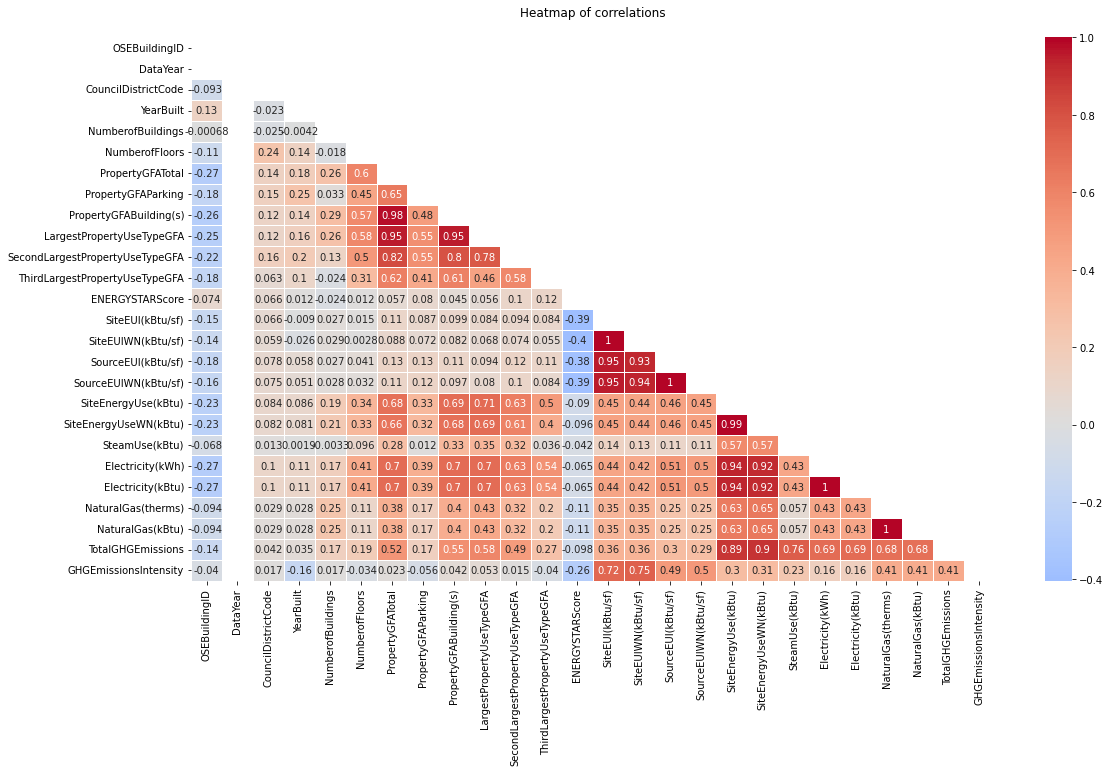

In [122]:
parametres = df2015.select_dtypes(include=[np.float64, np.int64]).columns

data_par = df2015[parametres]

plt.subplots(figsize=(18, 10))
matrix = np.triu(data_par.corr())

ax = sns.heatmap(data_par.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap of correlations\n')
plt.show()